In [1]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A    0
B    0
C    1
D    1
dtype: int64


## Section 1: Handling Missing Data


### Exercise 1.1: Identifying Missing Values



In [3]:

from io import StringIO

csv_data = """A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,"""
df = pd.read_csv(StringIO(csv_data))
print("Original DataFrame:\n", df, "\n")
print("Missing values per column:\n", df.isnull().sum())

df_more_missing = df.copy()
df_more_missing.loc[0, 'B'] = np.nan
df_more_missing.loc[2, 'A'] = np.nan
print("\nModified DataFrame with extra NaNs:\n", df_more_missing, "\n")
print("Missing values per column (modified):\n", df_more_missing.isnull().sum())


Original DataFrame:
       A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN 

Missing values per column:
 A    0
B    0
C    1
D    1
dtype: int64

Modified DataFrame with extra NaNs:
      A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  8.0
2  NaN  11.0  12.0  NaN 

Missing values per column (modified):
 A    1
B    1
C    1
D    1
dtype: int64



### Exercise 1.2: Eliminating Missing Values



In [4]:

print("Drop rows with any missing values:\n", df.dropna(axis=0), "\n")
print("Drop columns with any missing values:\n", df.dropna(axis=1), "\n")
print("Drop rows where all values are missing:\n", df.dropna(how='all'), "\n")
print("Drop rows with fewer than 4 non-missing values:\n", df.dropna(thresh=4), "\n")
print("Drop rows where 'C' is missing:\n", df.dropna(subset=['C']), "\n")

print("Dropping rows is preferable when the dataset is large and few rows contain missing values.")
print("Dropping columns is preferable when a feature has too many missing values to be reliable.")


Drop rows with any missing values:
      A    B    C    D
0  1.0  2.0  3.0  4.0 

Drop columns with any missing values:
       A     B
0   1.0   2.0
1   5.0   6.0
2  10.0  11.0 

Drop rows where all values are missing:
       A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN 

Drop rows with fewer than 4 non-missing values:
      A    B    C    D
0  1.0  2.0  3.0  4.0 

Drop rows where 'C' is missing:
       A     B     C    D
0   1.0   2.0   3.0  4.0
2  10.0  11.0  12.0  NaN 

Dropping rows is preferable when the dataset is large and few rows contain missing values.
Dropping columns is preferable when a feature has too many missing values to be reliable.



### Exercise 1.3: Imputing Missing Values
We use `SimpleImputer` to fill missing values with different strategies.


In [5]:

from sklearn.impute import SimpleImputer

imr_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed_mean = imr_mean.fit_transform(df.values)
print("Imputed (mean):\n", imputed_mean, "\n")

imr_median = SimpleImputer(missing_values=np.nan, strategy='median')
imputed_median = imr_median.fit_transform(df.values)
print("Imputed (median):\n", imputed_median, "\n")

imr_mf = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputed_mf = imr_mf.fit_transform(df.values)
print("Imputed (most_frequent):\n", imputed_mf, "\n")

print("'most_frequent' is especially useful for categorical features (e.g., colors, sizes) to fill with the mode.")


Imputed (mean):
 [[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]] 

Imputed (median):
 [[ 1.   2.   3.   4. ]
 [ 5.   6.   7.5  8. ]
 [10.  11.  12.   6. ]] 

Imputed (most_frequent):
 [[ 1.  2.  3.  4.]
 [ 5.  6.  3.  8.]
 [10. 11. 12.  4.]] 

'most_frequent' is especially useful for categorical features (e.g., colors, sizes) to fill with the mode.


## Section 2: Handling Categorical Data


### Exercise 2.1: Mapping Ordinal Features



In [6]:

df_cat = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    ['green', 'S', 9.7, 'class1'],
])
df_cat.columns = ['color', 'size', 'price', 'classlabel']

size_mapping = {'S': 0, 'M': 1, 'L': 2, 'XL': 3}
df_cat['size'] = df_cat['size'].map(size_mapping)
print(df_cat)

inv_size_mapping = {v: k for k, v in size_mapping.items()}
print("\nInverse mapped sizes:\n", df_cat['size'].map(inv_size_mapping))


   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2
3  green     0    9.7     class1

Inverse mapped sizes:
 0     M
1     L
2    XL
3     S
Name: size, dtype: object



### Exercise 2.2: Encoding Class Labels



In [8]:

from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df_cat['classlabel'].values)
print("Encoded labels:", y)
print("Inverse transform:", class_le.inverse_transform(y))

print("Many scikit-learn estimators expect class labels as integers (not strings).")


Encoded labels: [1 0 1 0]
Inverse transform: ['class2' 'class1' 'class2' 'class1']
Many scikit-learn estimators expect class labels as integers (not strings).



### Exercise 2.3: One-Hot Encoding for Nominal Features



In [9]:

X = df_cat[['color', 'size', 'price']].values.astype(object)

from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse_output=False)
X_color_ohe = ohe.fit_transform(X[:, [0]])
print("One-hot on color only:\n", X_color_ohe)

df_ohe_full = pd.get_dummies(df_cat[['price', 'color', 'size']], drop_first=False)
print("\nget_dummies (full):\n", df_ohe_full.head())

df_ohe_dropfirst = pd.get_dummies(df_cat[['price', 'color', 'size']], drop_first=True)
print("\nget_dummies (drop_first=True):\n", df_ohe_dropfirst.head())

print("\nDropping one dummy column per category avoids perfect multicollinearity in linear models.")


One-hot on color only:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]]

get_dummies (full):
    price  size  color_blue  color_green  color_red
0   10.1     1       False         True      False
1   13.5     2       False        False       True
2   15.3     3        True        False      False
3    9.7     0       False         True      False

get_dummies (drop_first=True):
    price  size  color_green  color_red
0   10.1     1         True      False
1   13.5     2        False       True
2   15.3     3        False      False
3    9.7     0         True      False

Dropping one dummy column per category avoids perfect multicollinearity in linear models.


## Section 3: Partitioning the Wine Dataset

In [10]:

wine_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df_wine = pd.read_csv(wine_url, header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

print(df_wine.head())
print("\nClass distribution overall:\n", df_wine['Class label'].value_counts())

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0, stratify=y
)
print('\n70/30 -> Train shape:', X_train.shape, 'Test shape:', X_test.shape)

X_train_80, X_test_20, y_train_80, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)
print('80/20 -> Train shape:', X_train_80.shape, 'Test shape:', X_test_20.shape)

import collections
def proportions(arr):
    c = collections.Counter(arr)
    total = len(arr)
    return {k: v/total for k, v in sorted(c.items())}

print("\nClass proportions (train 70/30):", proportions(y_train))
print("Class proportions (test 70/30):", proportions(y_test))
print("Class proportions (train 80/20):", proportions(y_train_80))
print("Class proportions (test 80/20):", proportions(y_test_20))

print("\n`stratify=y` preserves class proportions across splits, which is important with imbalanced classes.")


   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

## Section 4: Feature Scaling

### Exercise 4.1: Normalization (Min-Max Scaling)

First two normalized rows:
 [[0.64619883 0.83201581 0.4248366  0.46236559 0.27160494 0.35172414
  0.09704641 0.68       0.18987342 0.23623446 0.45744681 0.28571429
  0.19400856]
 [0.6871345  0.15612648 0.65359477 0.43548387 0.7654321  0.67931034
  0.50632911 0.74       0.2943038  0.3250444  0.81914894 0.63369963
  0.68259629]]


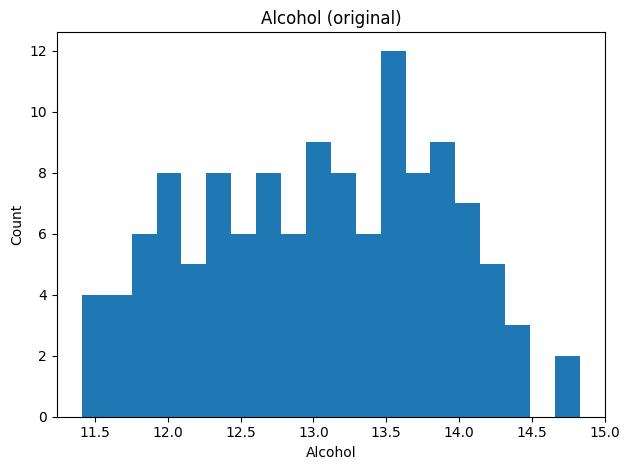

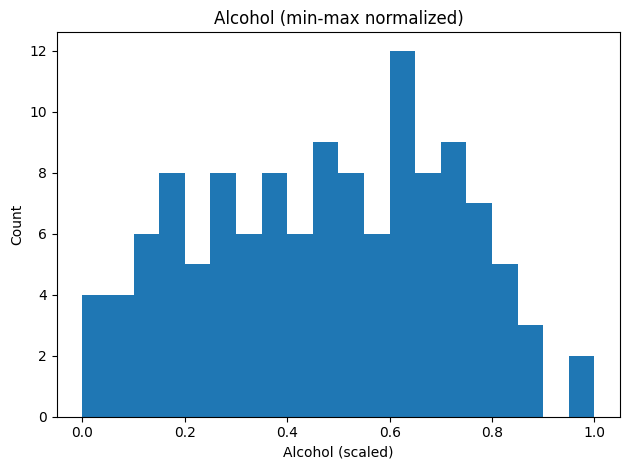

In [11]:

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

print("First two normalized rows:\n", X_train_norm[:2])

alcohol_train = X_train[:, 0]
alcohol_train_norm = X_train_norm[:, 0]

plt.figure()
plt.hist(alcohol_train, bins=20)
plt.title("Alcohol (original)")
plt.xlabel("Alcohol"); plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/4-1_alcohol_original_hist.png")
plt.show()

plt.figure()
plt.hist(alcohol_train_norm, bins=20)
plt.title("Alcohol (min-max normalized)")
plt.xlabel("Alcohol (scaled)"); plt.ylabel("Count")
plt.tight_layout()
plt.savefig("figures/4-1_alcohol_minmax_hist.png")
plt.show()


### Exercise 4.2: Standardization

In [12]:

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

print("First two standardized rows:\n", X_train_std[:2])

means = X_train_std.mean(axis=0)
stds = X_train_std.std(axis=0)
print("Mean (per feature, train):\n", np.round(means, 4))
print("Std  (per feature, train):\n", np.round(stds, 4))

print("\nStandardization is usually preferred for algorithms assuming Gaussian-like features or using distances/gradients (KNN, SVM, Logistic Regression).")


First two standardized rows:
 [[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
  -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
  -0.62946362]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876  1.01675879
   0.66299475  1.0887425  -0.49293533  0.13152077  1.33982592  0.54931269
   1.47568796]]
Mean (per feature, train):
 [ 0.  0.  0.  0. -0.  0.  0. -0.  0. -0. -0.  0. -0.]
Std  (per feature, train):
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]

Standardization is usually preferred for algorithms assuming Gaussian-like features or using distances/gradients (KNN, SVM, Logistic Regression).


## Section 5: Selecting Meaningful Features

### Exercise 5.1: L1 Regularization for Sparsity (Logistic Regression)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

Nonzero coefficient counts (total across classes) for Cs: {0.01: np.int64(0), 0.1: np.int64(13), 1.0: np.int64(23), 10.0: np.int64(25), 100.0: np.int64(27)}


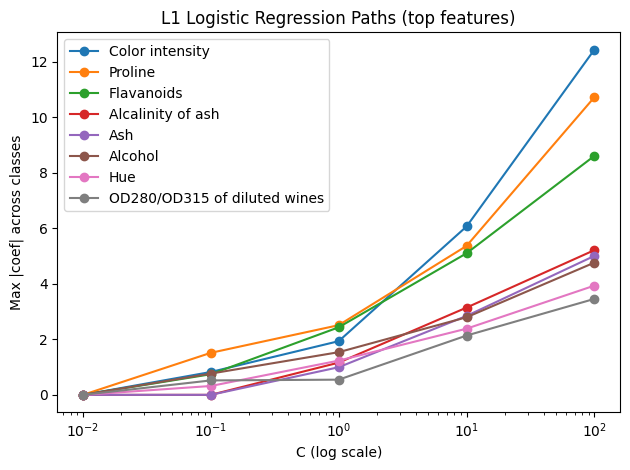

Training accuracy (C=1): 1.0
Test accuracy (C=1): 1.0
Coefficients (C=1):
 [[ 1.24572998  0.18063968  0.74370406 -1.16146556  0.          0.
   1.16997213  0.          0.          0.          0.          0.54750453
   2.51033461]
 [-1.53722377 -0.38703221 -0.99513708  0.36493139 -0.05955851  0.
   0.66795612  0.          0.         -1.93393651  1.23386892  0.
  -2.23181947]
 [ 0.13516421  0.16971314  0.35775331  0.          0.          0.
  -2.43352601  0.          0.          1.56184137 -0.81858551 -0.49633263
   0.        ]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [13]:

from sklearn.linear_model import LogisticRegression

Cs = [0.01, 0.1, 1.0, 10.0, 100.0]
feat_labels = df_wine.columns[1:]

nonzero_counts = []
coef_paths = []

for C in Cs:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear', multi_class='ovr', random_state=0)
    lr.fit(X_train_std, y_train)
    coef = lr.coef_

    nonzero = np.sum(coef != 0.0)
    nonzero_counts.append(nonzero)

    coef_paths.append(np.max(np.abs(coef), axis=0))

print("Nonzero coefficient counts (total across classes) for Cs:", dict(zip(Cs, nonzero_counts)))

coef_paths = np.array(coef_paths)

top_idx = np.argsort(-coef_paths[-1])[:8]

plt.figure()
for idx in top_idx:
    plt.plot(Cs, coef_paths[:, idx], marker='o', label=feat_labels[idx])
plt.xscale('log')
plt.xlabel('C (log scale)'); plt.ylabel('Max |coef| across classes')
plt.title('L1 Logistic Regression Paths (top features)')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig("figures/5-1_l1_paths.png")
plt.show()

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr', random_state=0)
lr.fit(X_train_std, y_train)
print("Training accuracy (C=1):", lr.score(X_train_std, y_train))
print("Test accuracy (C=1):", lr.score(X_test_std, y_test))
print("Coefficients (C=1):\n", lr.coef_)


### Exercise 5.2: Sequential Backward Selection (SBS)

In [14]:

from itertools import combinations
from sklearn.base import clone
from sklearn.metrics import accuracy_score

class SBS:
    """
    Sequential Backward Selection:
    - Start with all features
    - Iteratively remove the feature whose removal improves (or least degrades) score
    - Stop when k_features reached
    """
    def __init__(self, estimator, k_features=1, scoring=accuracy_score, test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state, stratify=y
        )

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            self.scores_.append(scores[best])
            dim -= 1

        self.k_score_ = self.scores_[-1]
        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


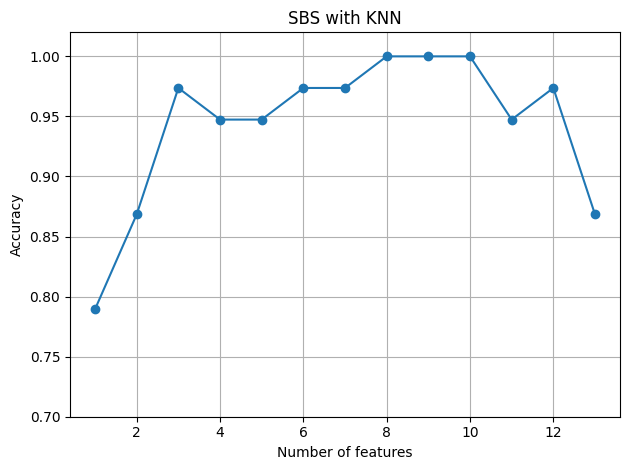

Selected 3-feature indices: [0, 6, 12]
Corresponding feature names: ['Alcohol', 'Flavanoids', 'Proline']
KNN test accuracy (3 features): 0.8888888888888888


In [15]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1, test_size=0.3, random_state=0)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.figure()
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.title('SBS with KNN')
plt.grid()
plt.tight_layout()
plt.savefig("figures/5-2_sbs_curve.png")
plt.show()

k3_subset = None
for subset in sbs.subsets_:
    if len(subset) == 3:
        k3_subset = list(subset)
        break

if k3_subset is None:

    k3_subset = list(sbs.subsets_[-1])

print("Selected 3-feature indices:", k3_subset)
print("Corresponding feature names:", df_wine.columns[1:][k3_subset].tolist())

knn.fit(X_train_std[:, k3_subset], y_train)
print("KNN test accuracy (3 features):", knn.score(X_test_std[:, k3_subset], y_test))


### Exercise 5.3: Feature Importance with Random Forests

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


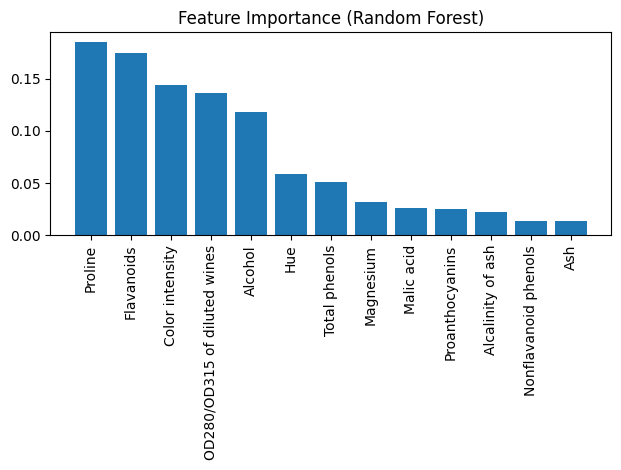

In [16]:

from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.figure()
plt.title('Feature Importance (Random Forest)')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.savefig("figures/5-3_rf_importance.png")
plt.show()


In [17]:

from sklearn.feature_selection import SelectFromModel

selector = SelectFromModel(forest, threshold=0.1, prefit=True)
X_train_sel = selector.transform(X_train)
X_test_sel = selector.transform(X_test)

selected_mask = selector.get_support()
selected_features = feat_labels[selected_mask]
print("Selected features (threshold=0.1):", list(selected_features))
print("Reduced shapes:", X_train_sel.shape, X_test_sel.shape)

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

lr_sel = LogisticRegression(max_iter=1000, random_state=0)
lr_sel.fit(X_train_sel, y_train)
print("LR on selected features -> Train acc:", lr_sel.score(X_train_sel, y_train),
      "Test acc:", lr_sel.score(X_test_sel, y_test))

knn_sel = KNeighborsClassifier(n_neighbors=5)
knn_sel.fit(X_train_sel, y_train)
print("KNN on selected features -> Test acc:", knn_sel.score(X_test_sel, y_test))


Selected features (threshold=0.1): ['Alcohol', 'Flavanoids', 'Color intensity', 'OD280/OD315 of diluted wines', 'Proline']
Reduced shapes: (124, 5) (54, 5)
LR on selected features -> Train acc: 0.9596774193548387 Test acc: 1.0
KNN on selected features -> Test acc: 0.6851851851851852


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Questions:
1. Why is handling missing data important?
   Missingness can break algorithms, reduce data efficiency, and bias models. Proper handling (drop vs. impute) preserves information and validity.

2. When should you use one-hot encoding vs. label encoding?
   - **One-hot** for **nominal/unordered** categories (color, city).  
   - **Label encoding** for **ordinal/ordered** categories (size: S < M < L).

3. How does feature scaling impact algorithms like KNN or SVM?
   They are sensitive to feature scales; scaling prevents large-scale features from dominating distances/gradients and typically improves accuracy and convergence.

4. Compare L1 regularization and SBS for feature selection.  
   - **L1**: embedded, fast, produces sparse weights during training.  
   - **SBS**: wrapper, model-agnostic, can find strong subsets but is computationally heavier.  
   - Use L1 for a quick, stable baseline; use SBS when you want subset control or non-linear estimators.



# **Conclusion:**

Working with the wine dataset showed me how essential preprocessing and feature selection are in building reliable machine learning models. Normalizing the chemical property values, such as alcohol content and acidity, placed all features on the same scale and prevented bias during training. Handling missing values ensured that the dataset remained consistent, while feature selection helped highlight the most influential characteristics—like phenols and flavanoids—that drive wine classification. I also observed how regularization acts like a balance, preventing the model from memorizing noise while still capturing meaningful patterns. Overall, this process made me appreciate that successful predictions do not only depend on the model itself, but also on how well the data is prepared and refined before modeling.